# Problem 1: Cake Eating with Dynamic Programming, VFI, and Collocation Method (90 points)

Consider the cake-eating problem formulated as a dynamic programming problem:

$$v(w) = \max_{0 \leq c \leq w} \left[ u(c) + \beta v(w') \right]$$

subject to:

$$    w' = (w - c)(1 + r).
$$ 

Assume the utility function:

$$    u(c) = \frac{c^{1-\sigma}}{1 - \sigma}. $$

### (a) Use an educated guess for the value function and apply the guess-and-verify method to find the function. 

Given the particular utility function, let us guess that:

$$
v(w) = B \frac{w^{1-\sigma}}{1 - \sigma}
$$

where $ B $ is a coefficient to be determined. The Bellman equation:

$$
v(w) = \max_c \left[ \frac{c^{1-\sigma}}{1 - \sigma} + \beta B \frac{[(w - c)(1 + r)]^{1-\sigma}}{1 - \sigma} \right]
$$

Taking the first-order condition (FOC):

$$
c^{-\sigma} = \beta B (1 + r)^{1-\sigma} (w - c)^{-\sigma}
$$

From this equation and the budget constraint, we obtain:

$$
c = \zeta w, \quad w' = (1 - \zeta)(1 + r)w
$$

where:

$$
\zeta = \frac{( \beta B)^{-\frac{1}{\sigma}} (1 + r)^{-\frac{1-\sigma}{\sigma}}}{1 + ( \beta B)^{-\frac{1}{\sigma}} (1 + r)^{-\frac{1-\sigma}{\sigma}}}
$$

With these policy functions, the Bellman equation simplifies to:

$$
B \frac{w^{1-\sigma}}{1 - \sigma} = \frac{(\zeta w)^{1-\sigma}}{1 - \sigma} + \beta B \frac{[(1 - \zeta)(1 + r)w]^{1-\sigma}}{1 - \sigma}
$$
Therefore, if the guess is correct, it must be the case that:
$$ B = \xi^{1-\sigma} + \beta B (1+r)^{1-\sigma}(1-\xi)^{1-\sigma} $$
After some tedious algebra, the value of B is revealed from this equation as:
$$
B = \left[ 1 - (1 + r)^{\frac{1-\sigma}{\sigma}} \beta^{\frac{1}{\sigma}} \right]^{-\sigma}
$$

Note that with this value found, we can also find the actual policy functions using
(1).

### [(b)] Assume parameters $\beta = 0.95$, $\sigma = 2$, and $r = 0.2$. Use a uniform grid of $N = 1000$ points over the interval $[0.1, 5]$ to find $v(w)$ numerically using Value Function Iteration (VFI). (30)

  Columns 1 through 16

 -831.9072 -792.0118 -755.1229 -721.3971 -690.9210 -663.1844 -637.7893 -614.4089 -592.7834 -572.6914 -553.9551 -536.4176 -519.9528 -504.4452 -489.8031 -475.9385

  Columns 17 through 32

 -462.7833 -450.2687 -438.3432 -427.1232 -416.4514 -406.3575 -396.8045 -387.6507 -378.9476 -370.6735 -362.6942 -355.0764 -347.8088 -340.7595 -334.0075 -327.5481

  Columns 33 through 48

 -321.2493 -315.2001 -309.4007 -303.7929 -298.4000 -293.2231 -288.2401 -283.3952 -278.7185 -274.2156 -269.8675 -265.6192 -261.5058 -257.5363 -253.6932 -249.9216

  Columns 49 through 64

 -246.2602 -242.7209 -239.2872 -235.9499 -232.6976 -229.5437 -226.4867 -223.5114 -220.6100 -217.7723 -215.0139 -212.3349 -209.7204 -207.1636 -204.6548 -202.2117

  Columns 65 through 80

 -199.8351 -197.5105 -195.2315 -193.0117 -190.8470 -188.7357 -186.6775 -184.6580 -182.6713 -180.7326 -178.8383 -176.9872 -175.1797 -173.4012 -171.6461 -169.9310

  Columns 81 through 96

 -168.2525 -166.6099 -165.0039 -163.4294 

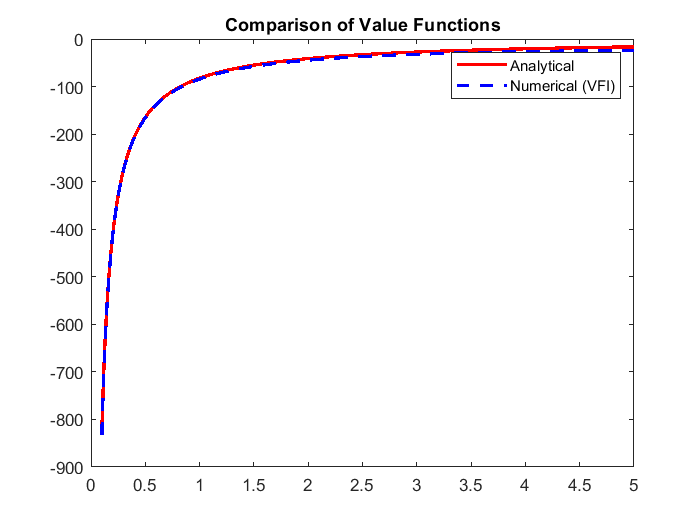

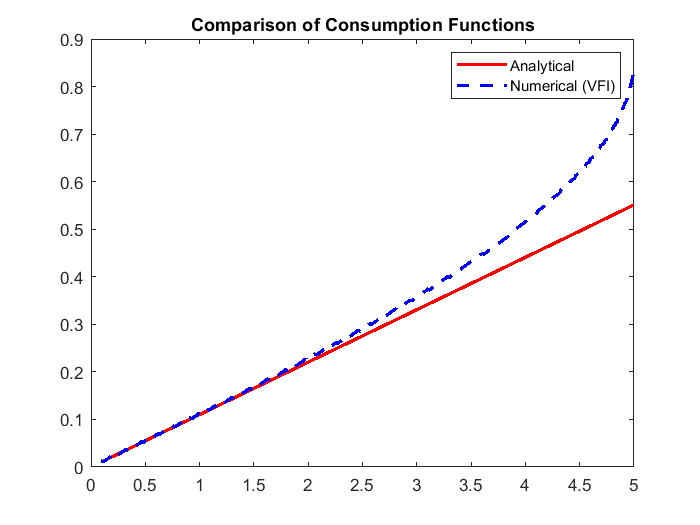

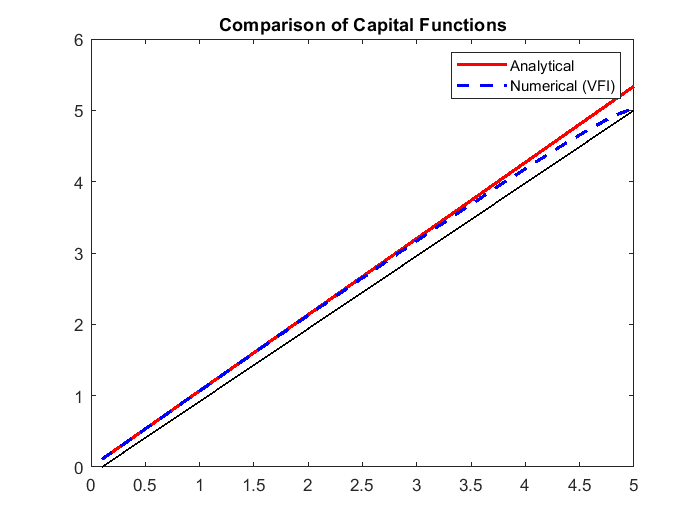

In [10]:
clc; 
clear;

beta = 0.95;
sigma = 2;
r = 0.2;
Np = 1000;
Nk = 1000;

wgrid = linspace(0.1, 5, Np)';

%% Analytical solution

B = (1-(((1+r)^(1-sigma))*beta)^(1/sigma))^(-sigma);
X = (((1+r)^(1-sigma))*beta*B)^(-1/sigma)/(1+(((1+r)^(1-sigma))*beta*B)^(-1/sigma));

%Analytical solutions of w and c
c_an = X*wgrid;
c_an(c_an<0) = 0;
wprime_an = (wgrid-c_an)*(1+r);

% From the guess and verify method
v_guess = (1/(1-sigma))*B*wgrid .^ (1-sigma);

%% Value Function Iteration 
%with my resource constraint
consu = wgrid - (wgrid'/(1+r));

consu(consu<0) = 0;

Ret = ut(sigma, consu);

V = zeros(Np,Nk);  % Initial guess for VFI

%Im using this guess to start (the first column of the value function)
V(:,1) = ut(sigma, wgrid);

%any v should work but the closer you are to the solution the better

for i=1:Nk-1
    %Bellman equation. v is the same vector but you are evaluating the k_j
    %the last transpose is because Gauss goes col by col
    V(:,i+1) = max((Ret+beta*V(:,i)')')';
        if max(abs(V(:,i+1) - V(:,i))) <= 0.001*(1-beta);
            [value, windex] = max((Ret+beta*V(:,i)')');
            disp(value);
            disp(windex);
            disp("convergence achieved");
            disp(i);
            break;
        end
end

% Compute the policy function
wprime_value = wgrid(windex); % Maps indices to actual capital values


% Extract optimal consumption using correct indexing
c_value = zeros(Np, 1); % Preallocate for efficiency
for i = 1:Nk
    c_value(i) = consu(i,windex(i));
end

%% Plot Value Functions (Part c)
figure;
plot(wgrid, v_guess, 'r', 'LineWidth', 2); hold on;
plot(wgrid, value, 'b--', 'LineWidth', 2);
legend('Analytical', 'Numerical (VFI)');
title('Comparison of Value Functions');

%% Plot Value Functions (Part c)
figure;
plot(wgrid, c_an, 'r', 'LineWidth', 2); hold on;
plot(wgrid, c_value, 'b--', 'LineWidth', 2);
legend('Analytical', 'Numerical (VFI)');
title('Comparison of Consumption Functions');

%% Plot Value Functions (Part c)

line = linspace(0, 5, Np);
y = line;

figure;
plot(wgrid, wprime_an, 'r', 'LineWidth', 2); hold on;
plot(wgrid, wprime_value, 'b--', 'LineWidth', 2); hold on;
plot(wgrid, y, 'black', 'LineWidth', 1)
legend('Analytical', 'Numerical (VFI)');
title('Comparison of Capital Functions');

### [e] Orthogonal Collocation 
Most likely you have found a weird result in c) and d). Use now the orthogonal
collocation method to approximate the policy function for w′. Solve and show the
optimization problem for the agent, deriving the Euler equation you must use to find
the residual function for the collocation method. Plot the policy function for w′. Do
you find a better approximation now? What do you think is the reason? (30)

#### Solution 
Using the Bellman equation, the first-order condition is:

$$
u'(c) = \beta (1 + r) v'(w')
$$

Applying the envelope condition $ v'(w) = u'(c) $, we obtain the Euler equation:

$$
u'(c) = \beta (1 + r) u'(c')
$$

Defining the policy function for next period cake as g(w), the Euler equation can be
written as:
$$ u'(w-g(w)/(1+r)) = \beta (1+r) u'(g(w) - g(g(w))/(1+r))
$$

Using the policy function approximation:

$$
\hat{g}(w,a) = \sum_{i=1}^{n} a_i \varphi_i(w)
$$

where:

$$
\varphi_i(w) = w T_{i-1}(w) = w \cos((i-1) \arccos(w))
$$

Another basis could be safely chosen, like ordinary polynomials because we know that
this problem has a linear policy function. In general, we may want to use Chebychev
polynomials. Under orthogonal collocation, using any basis we would use the zeros
of the nth term of the Chebychev polynomial, as we have done before.

As we can see the approximation is very good. Note that projection methods do
not impose any restriction where the policy function should “live”. In the VFI we
are restricted by the grid, therefore, in this case VFI is truncating the true range of
the policy function, which delivers then a bad approximation.


Local minimum possible.

lsqnonlin stopped because the final change in the sum of squares relative to 
its initial value is less than the value of the function tolerance.



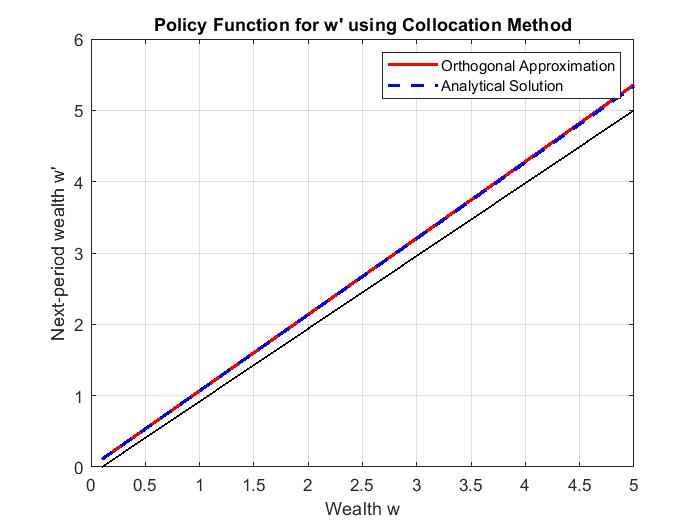

In [13]:
%% Orthogonal collocation method for Cake-Eating Problem
Np = 1000;

wgrid = linspace(0.1, 5, Np)';

% Parameters
r = 0.2;  
sigma = 2; 
beta = 0.95;

param = [r, sigma, beta];

% First guess for coefficients
a0 = [0.2; 0.1; 0.01; 0.001; 0.0001; 0.00001; 0.000001];  
n = length(a0);
l = 1:1:n;

% Chebyshev nodes (important to transpose z)
z = cos((2*(1:n)' - 1)*pi/(2*n));

% Define the bounds for wealth w
w_min = min(wgrid);
w_max = max(wgrid);

% Transform Chebyshev nodes to range [w_min, w_max]
w = ((z+1)*(w_max-w_min)/2)+w_min;

%This is phi_i(k)
aa = T(w);

%Now we multiply by a to get the function g(k; a)
bb = g(w, a0);

%Finally, we compute the residual function
cc = R(w, a0, param);

% Solve for coefficients using nonlinear least squares
as = lsqnonlin(@(a) R(w, a, param), a0);

% Evaluate Chebyshev polynomials on wgrid
t = 2*((wgrid - w_min)./(w_max-w_min))-1;
Ts = zeros(length(wgrid), n);
for i = 0:n-1
    Ts(:, i+1) = wgrid .* cos(i*acos(t));
end

% Approximate policy function
gpol = Ts * as;

% Functions
function [Ts] = T(w)
    w_min = 0.1;
    w_max = 5;

    % Compute transformation into Chebyshev space
    t_cheb = 2*((w-w_min)./(w_max-w_min))-1;

    % Initialize the matrix for Chebyshev polynomials
    Ts = zeros(length(t_cheb), length(t_cheb));

    %Compute Chebyshev polynomials for each w
    for i = 0:length(t_cheb)-1
        Ts(:, i+1) = w .* cos(i * acos(t_cheb));
    end
end

function [g] = g(w, a)
    g = T(w) * a;
end

function [R] = R(w, a, param)
    r = param(1);
    sigma = param(2);
    beta = param(3);

    % Compute the policy function g(w, a)
    gw = g(w, a);
    ggw = g(gw, a); % g(g(w, a), a), the next-period capital policy function
    
    % Compute consumption using feasibility constraint
    c = w - gw / (1 + r);
    
    % Compute the RHS of the Euler equation
    rhs = ( (c.^(-sigma)) / (beta * (1 + r)) ).^(-1/sigma);
    
    % Residual function
    R = gw - rhs - (ggw/(1+r));
end

% Plot results
figure;
plot(wgrid, gpol, 'r', 'LineWidth', 2); hold on;
plot(wgrid, wprime_an, 'b--', 'LineWidth', 2); hold on;
plot(wgrid, y, 'black', 'LineWidth', 1)
xlabel('Wealth w');
ylabel('Next-period wealth w''');
legend('Orthogonal Approximation', 'Analytical Solution');
title('Policy Function for w'' using Collocation Method');
grid on;

# Value Function Iteration for the Stochastic NGM (60 points)

Consider the optimization problem for a central planner, aiming to maximize:
$$ \max \mathbb{E}_0 \sum_{t=0}^\infty \beta^t u(c_t), \quad 0 < \beta < 1
$$
subject to:
$$ c_t + i_t  = z_t F(k_t, n_t)$$ 
$$k_{t+1}  = i_t + (1 - \delta)k_t, \quad k_0 > 0 \text{ given}.$$

The productivity shock follows an AR(1) process:

$$    z_{t+1} = z_t^{\rho} e^{\epsilon_t}, \quad \epsilon_t \sim N(0, \sigma^2).$$
The utility and production functions are:

$$u(c_t) = \frac{c_t^{1-\gamma}}{1-\gamma}, \quad F(k_t, 1) = k_t^\alpha.$$

Using the parameter values:

$$\alpha  = 0.36, \quad \beta = 0.98, \quad \delta = 0.03, $$ 
$$\gamma  = 2, \quad \sigma = 0.1, \quad \rho = 0.7.
$$

## [a] Construct a 5-state Markov approximation for $\ln z_t$ using Tauchen’s method. Use 3 standard deviations as bounds for the grid ($m=3$). Find the ergodic distribution. (10)

### Solution 

Take the log for the AR(1) process
$$ \ln z_{t+1} = \rho \ln z_t + \epsilon_t , \quad \epsilon \sim N(0,\sigma^2)$$

 $$
\mathbb{E} \ln z_t = 0
 $$

 $$
\mathbb{V} \ln z_t = \frac{\sigma^2}{1 - \rho^2} = \frac{0.01}{0.51}
 $$

With $\sigma_z = \sqrt{\mathbb{V} \ln z_t}$, we actually have that the support of the discretized distribution should be:

 $$
[-3\sigma_z, -1.5\sigma_z, 0, 1.5\sigma_z, 3\sigma_z]
 $$

Then, with Tauchen’s method and the code provided, we have the stationary distribution as below:



--------------------------------------------------
Problem 2(a): Tauchen approximation and ergodic distribution


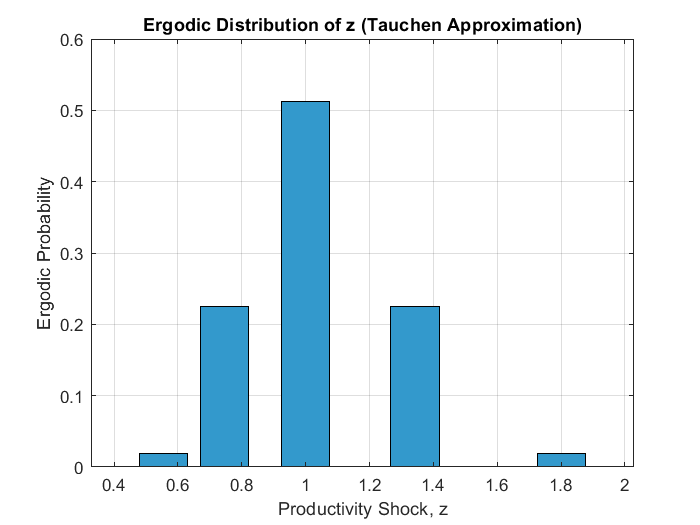

In [14]:
clear; close all; clc;

%% PARAMETERS
alpha    = 0.36;
beta     = 0.98;
delta    = 0.03;
gamma    = 2;          % CRRA risk aversion coefficient in u(c)= c^(1-gamma)/(1-gamma)
sigma_eps = 0.1;       % Std. dev. of the shock ε in ln(z)
rho      = 0.7;        % AR(1) coefficient
N_z      = 5;          % Number of states for the shock process
m        = 3;          % Bounds: grid covers [mu - m*sigma, mu + m*sigma]

% For the AR(1): ln(z_t+1) = rho*ln(z_t) + ε, the stationary std. is:
sigma_z = sigma_eps / sqrt(1 - rho^2);

%% (a) TAUCHEN APPROXIMATION AND ERGODIC DISTRIBUTION
disp('--------------------------------------------------');
disp('Problem 2(a): Tauchen approximation and ergodic distribution');

% Use Tauchen’s method to discretize ln(z)
% (Assuming tauchen.m is available; see the tauchen function below.)
[grid_lnz, P] = tauchen(N_z, 0, rho, sigma_z, m);
z_vals = exp(grid_lnz);  % Convert from ln(z) to z

% Compute the ergodic (stationary) distribution by finding the eigenvector
% associated with eigenvalue 1 of the transition matrix.
[V_eig, D] = eig(P');
[~, idx] = min(abs(diag(D) - 1));
ergodic_dist = V_eig(:, idx);
ergodic_dist = ergodic_dist / sum(ergodic_dist);  % Normalize

% Plot the ergodic distribution.
figure;
bar(z_vals, ergodic_dist, 'FaceColor',[0.2 0.6 0.8]);
xlabel('Productivity Shock, z');
ylabel('Ergodic Probability');
title('Ergodic Distribution of z (Tauchen Approximation)');
grid on;

### [(b)] Using the discretized process from (a), solve the model with VFI. Construct a grid of 1000 points with capital bounds $[0.01k, 4k]$, where $k$ is the non-stochastic steady-state capital. Compute the value and policy functions. (20)

--------------------------------------------------
Problem 2(b): Solving model via VFI
Iteration 50, distance = 1.993129e-01
Iteration 100, distance = 6.437250e-02
Iteration 150, distance = 2.296328e-02
Iteration 200, distance = 8.330011e-03
Iteration 250, distance = 3.031245e-03
Iteration 300, distance = 1.103725e-03
Iteration 350, distance = 4.019315e-04
Iteration 400, distance = 1.463704e-04
Iteration 450, distance = 5.330362e-05
Iteration 500, distance = 1.941156e-05
Iteration 550, distance = 7.069100e-06
Iteration 600, distance = 2.574352e-06
VFI converged in 647 iterations with distance = 9.960783e-07


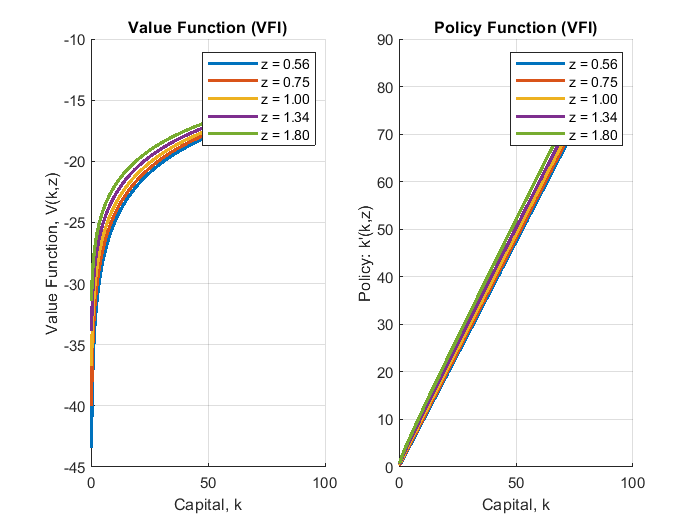

In [5]:
%% (b) VALUE FUNCTION ITERATION (VFI) TO SOLVE THE MODEL
disp('--------------------------------------------------');
disp('Problem 2(b): Solving model via VFI');

% Compute the non-stochastic steady-state capital (k_ss) using the formula:
k_ss = (alpha * beta / (1 - beta*(1-delta)))^(1/(1-alpha));

% Set up a grid for capital with 1000 points in [0.01*k_ss, 4*k_ss]
N_k = 1000;
k_grid = linspace(0.01*k_ss, 4*k_ss, N_k)';

% Preallocate the value function and a policy function index matrix.
V         = zeros(N_k, N_z);    % Each column corresponds to a shock state.
policy_ind = zeros(N_k, N_z);    % Will store the index of optimal k' from the grid.

% Tolerance and maximum iterations for VFI.
tol      = 1e-6;
max_iter = 1000;
iter     = 0;
dist     = inf;

% Define the period utility function (CRRA). For c <= 0, assign a very low value.
u = @(c) (c > 0) .* (c.^(1-gamma))/(1-gamma) + (c <= 0)*(-1e10);

% VFI: For each state (k, z), choose k' to maximize:
%   u(c) + beta * E[V(k',z')]
% where c = z*k^alpha + (1-delta)*k - k'.
while dist > tol && iter < max_iter
    V_new = zeros(size(V));
    for iz = 1:N_z
        z_now = z_vals(iz);
        for ik = 1:N_k
            current_k = k_grid(ik);
            % For each candidate k', compute consumption from the resource constraint.
            cons = z_now * current_k^alpha + (1-delta)*current_k - k_grid;
            % Compute current period utility.
            util = u(cons);
            % Compute expected continuation value:
            EV = 0;
            for iz_next = 1:N_z
                EV = EV + P(iz, iz_next) * V(:, iz_next);
            end
            % Total return from choosing each possible k'.
            total_return = util + beta * EV;
            % Choose the k' that gives the highest value.
            [V_new(ik, iz), policy_ind(ik, iz)] = max(total_return);
        end
    end
    dist = max(max(abs(V_new - V)));
    V = V_new;
    iter = iter + 1;
    if mod(iter,50)==0
        fprintf('Iteration %d, distance = %e\n', iter, dist);
    end
end
fprintf('VFI converged in %d iterations with distance = %e\n', iter, dist);

% Extract the policy function for capital (k') using the index.
policy_k = k_grid(policy_ind);

% Plot the value function and policy function for each shock state.
figure;
subplot(1,2,1);
hold on;
for iz = 1:N_z
    plot(k_grid, V(:, iz), 'LineWidth', 2);
end
xlabel('Capital, k');
ylabel('Value Function, V(k,z)');
title('Value Function (VFI)');
legend(arrayfun(@(z) sprintf('z = %.2f', z), z_vals, 'UniformOutput', false));
grid on;

subplot(1,2,2);
hold on;
for iz = 1:N_z
    plot(k_grid, policy_k(:, iz), 'LineWidth', 2);
end
xlabel('Capital, k');
ylabel('Policy: k''(k,z)');
title('Policy Function (VFI)');
legend(arrayfun(@(z) sprintf('z = %.2f', z), z_vals, 'UniformOutput', false));
grid on;

### [(c)] Using the policy functions from (b), simulate capital stock over 10,000 observations. Use a random number generator to simulate the Markov chain for shocks. Plot the simulation and compute the histogram. Verify if it approximates the ergodic distribution of capital. (30)

--------------------------------------------------
Problem 2(c): Simulation over 10,000 periods


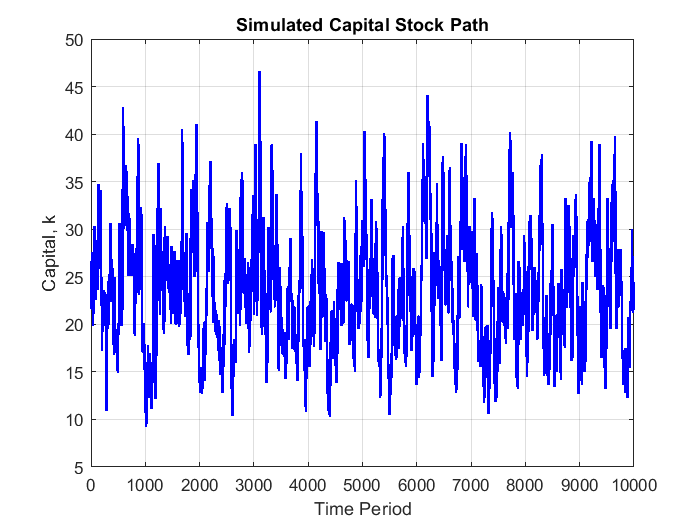

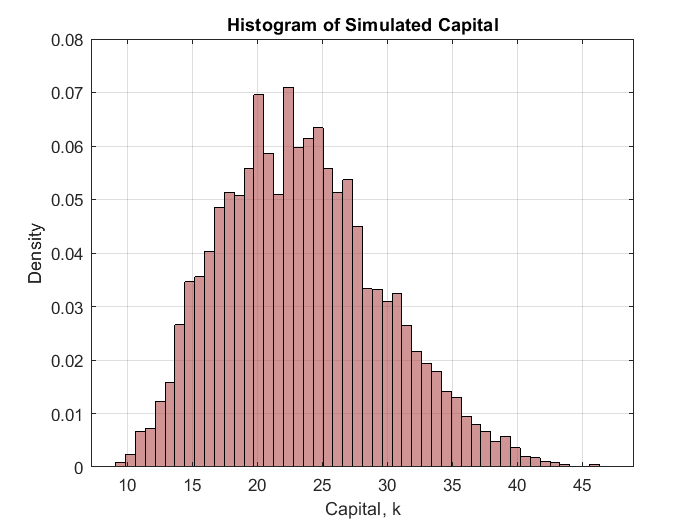

In [6]:
%% (c) SIMULATION OF THE CAPITAL STOCK PATH
disp('--------------------------------------------------');
disp('Problem 2(c): Simulation over 10,000 periods');

T = 10000;           % Number of simulation periods
k_sim   = zeros(T,1);
z_sim   = zeros(T,1);   % To record actual z levels
z_ind_sim = zeros(T,1); % To record shock state indices

% Initialize simulation at the nonstochastic steady state and median shock.
[~, mid_ind] = min(abs(k_grid - k_ss));
k_sim(1)    = k_grid(mid_ind);
z_ind_sim(1)= ceil(N_z/2);
z_sim(1)    = z_vals(z_ind_sim(1));

% Precompute cumulative probabilities for the shock transition matrix.
cumP = cumsum(P,2);

rng(123);  % Set seed for reproducibility.
for t = 2:T
    % Determine next shock state using the Markov chain.
    r = rand;
    current_state = z_ind_sim(t-1);
    next_state = find(cumP(current_state,:) >= r, 1, 'first');
    z_ind_sim(t) = next_state;
    z_sim(t) = z_vals(next_state);
    % Find nearest index for current capital.
    [~, ind_k] = min(abs(k_grid - k_sim(t-1)));
    % Use the policy function corresponding to the current shock state.
    k_sim(t) = policy_k(ind_k, current_state);
end

% Plot the simulated capital path.
figure;
plot(1:T, k_sim, 'b', 'LineWidth',1.5);
xlabel('Time Period');
ylabel('Capital, k');
title('Simulated Capital Stock Path');
grid on;

% Plot a histogram of simulated capital.
figure;
histogram(k_sim, 50, 'Normalization','pdf','FaceColor',[0.7 0.3 0.3]);
xlabel('Capital, k');
ylabel('Density');
title('Histogram of Simulated Capital');
grid on;



# 3. The Neoclassical Growth Model with variable labor supply. (70 points)

A central planner solves:

$$
V(k) = \max_{c, k', \ell} \left[ u(c, \ell) + \beta V(k') \right]
$$

subject to:

$$
k' + c = F(k, \ell) + (1 - \delta)k, \quad \ell \in [0,1].
$$

where $\ell$ represents labor supply. The utility and production functions are:

$$
u(c,\ell) = \frac{c^{1-\sigma}}{1 - \sigma} - \chi \frac{\ell^{1+\frac{1}{\phi}}}{1+\frac{1}{\phi}},
$$

$$
F(k, \ell) = k^\alpha \ell^{1-\alpha}.
$$

The parameters are:

$$\alpha = 0.36, \quad \delta = 0.03, \quad \sigma = 2,$$ 
$$\beta = 0.95, \quad \phi = 2.$$




### [a] Calibrate the value for $\chi$ to a target value for $\bar{\ell}$ (steady state value) equal to $1/3$. (10)

#### Answer.
The Bellman equation can be written as:

 $$
V(k) = \max_{c, \ell} \left[ \frac{c^{1 - \sigma}}{1 - \sigma} - \frac{\chi \varphi}{1 + \varphi} \ell^{1 + \frac{1}{\varphi}} + \beta V(k^{\alpha} \ell^{1 - \alpha} + (1 - \delta)k - c) \right]
 $$

Taking the derivative on both sides with respect to \( c, \ell \), we obtain:

 $$
c^{-\sigma} - \beta V'(k') = 0
 $$

 $$
- \chi \ell^{\frac{1}{\varphi}} + \beta (1 - \alpha) k^{\alpha} \ell^{- \alpha} V'(k') = 0
 $$

The Envelope condition is:

 $$
V'(k) = \beta \left[ \alpha k^{\alpha - 1} \ell^{1 - \alpha} + (1 - \delta) \right] V'(k')
 $$

We use these relationships to find the Euler equation and the intratemporal condition for labor supply as done before.

At steady state, we set \( k = k' = \bar{k} \), so the Envelope condition states:

 $$
1 = \beta (\alpha \bar{k}^{\alpha - 1} \bar{\ell}^{1 - \alpha} + 1 - \delta)
 $$

Thus, we have:

 $$
\frac{\bar{k}}{\bar{\ell}} = \left( \frac{1}{\beta} + \delta - 1 \right)^{\frac{1}{\alpha - 1}}
 $$

From the intratemporal condition:

 $$
(1 - \alpha) \bar{k}^{\alpha} \bar{\ell}^{-\alpha} \bar{c}^{-\sigma} = \chi \bar{\ell}^{\frac{1}{\varphi}}
 $$

Therefore:

 $$
\chi = \frac{(1 - \alpha) \left( \frac{1}{\beta} + \delta - 1 \right)^{\frac{\alpha}{\alpha - 1}} \bar{c}^{-\sigma}}{\bar{\ell}^{\frac{1}{\varphi}}}
 $$

while \( \bar{c} \) is:

 $$
\bar{c} = \bar{k}^{\alpha} \bar{\ell}^{1 - \alpha} - \delta \bar{k} = \left( \frac{1}{\beta} + \delta - 1 \right)^{\frac{\alpha}{\alpha - 1}} - \delta \left( \frac{1}{\beta} + \delta - 1 \right)^{\frac{1}{\alpha - 1}}
 $$

Substituting parameter values, we obtain:

 $$
\bar{k} = 3.3232, \quad \bar{c} = 0.6631, \quad \bar{\ell} = \frac{1}{3}, \quad \chi = 5.7692
 $$

### [b] Compute the policy functions for capital, consumption and labor supply using VFI.
Present graphics for the three functions. For this consider a grid of 500 points for the
capital stock staring at 0.2k and ending at 1.2k, where k is the steady state value of
capital.1 (30)

You need to discretize time between [0, 1], use also 500 points.

In [ ]:

clc;
clear all; close all;

% Number of iterations:
Nk = 5000; 

% Parameters
alpha = 0.36;
beta = 0.95; 
sigma = 2;
delta = 0.03;
%phi = 2;
phi = 2; 

% Steady states:
lss = 1/3;
kss = lss*((beta*alpha)/(1+beta*(delta-1)))^(1/(1-alpha));
css = kss^(alpha) * lss^(1 - alpha) - delta*kss; 

% Chi:
chi = (1-alpha)*kss^alpha*lss^(-alpha)*(kss^alpha*lss^(1-alpha)-delta*kss)^(-sigma)*lss^(-1/phi);

% Setting up kgrid:
kgrid = linspace(0.01*kss, 1.2*kss,500)';

% Setting up lgrid; b/c now we are also varying it
lgrid = linspace(0,1,500)';

%Initial value function
vf = ones(1,500)*ut2(css, lss, sigma, chi, phi);

% Placeholders:
vf_place = zeros(1,500);
kpol = zeros(1,500);
lpol = zeros(1,500);
cpol = zeros(1,500);

difference = 90;

%Solving using VFI
for p = 1: Nk
    for i = 1:500
        k = kgrid(i);
        v_temp = -inf;
        for h = 1:500 
            l = lgrid(h);
            c = ((chi*l^(1/phi))/((1-alpha)*k^alpha*l^(-alpha)))^(1/-sigma);
            kplus1 = k^alpha*l^(1-alpha)+(1-delta)*k-c;
                if kplus1 < 0
                    continue
                else
                    vplus1 = interp1(kgrid,vf,kplus1,"linear", "extrap");
                    v = c^(1-sigma)/(1-sigma)-(chi*phi/(1+phi))*l^(1+1/phi)+beta*vplus1;
                         if v > v_temp 
                            v_temp = v;
                            k_new = kplus1;
                            l_new = l;
                            c_new = c;
                         else
                             continue
                         end
                
                end 
       end

    vf_place(i) = v_temp;
    kpol(i) = k_new;
    lpol(i) = l_new;
    cpol(i) = c_new;

    end

difference = max(abs(vf_place-vf));
vf = vf_place;

if difference < 0.0001
    disp("Convergence Achieved")
    break
end 

end

% Plotting
figure; 
plot([1:500], vf);
xlabel('Time');
ylabel('Value');
title ('Value Function, phi = 2');

figure;
plot([1:500], kpol);
xlabel('Time');
ylabel('Capital');
title ('Capital Policy Function, phi = 2');

figure;
plot([1:500], cpol);
xlabel('Time');
ylabel('Consumption');
title ('Consumption Policy Function, phi = 2');

figure;
plot([1:500], lpol);
xlabel('Time');
ylabel('Labor');
title ('Labor Policy Function, phi = 2');


function u = ut2(c, l, sigma, chi, phi)
    if abs(sigma - 1) < eps
        cutility = log(c);
    else
        cutility = (c.^(1 - sigma))/(1 - sigma);
    end

    ldisutility = chi*phi*(l.^(1 + 1 / phi))/(1 + phi);
    % Total utility
    u = cutility - ldisutility;
end
%%
figure;
plot(kgrid, lpol, 'LineWidth', 2);
xlabel('Capital (k)');
ylabel('Labor Supply (l)');
title('Labor vs Capital Policy Function, \phi = 2');
grid on;

![alt text](q3_b_fig1.png)
![alt text](q3_b_fig4.png) 
![alt text](q3_b_fig2.png) 
![alt text](q3_b_fig3.png)

### [c] Take the first point of approximation to be equal to 0.001k. 
Use a non-uniform
grid to find the policy functions for capital, consumption and labor supply using
VFI. Present graphics for the three functions. Comment on the shape of the policy
functions, especially the policy function for labor supply. Can you give an intuitive
explanation of its shape? What happen when the stock capital is near the lower
bound? (20)

Now, we take the first point equal to 0.001 ̄k. And to implement the non-uniform
grid, we use a transformation such that the grid is finer for low values of the capital
stock.

The approximation is better near the lower bound. The policy function for labor
indicates that labor tends to 1. That is because capital is so low the marginal product
of capital is very large. The marginal product of labor is large too and agents work
a lot there.

### [d] Repeat the exercise in c) assuming φ = 1/2. Explain the intuition. 

When $\varphi = 1/2$ , we note that there should be a change in $\chi$. And we should obtain:
$$ k_{ss} = 3.3232, \quad c_{ss} = 0.6631, \quad l_{ss} = 1/3, \quad \chi = 29.97 $$ 

From the figure, comparing with the case of φ = 2, the biggest change is the policy
function for labor. The mechanism driving the increasing of χ is the decrease in φ,
the Frisch elasticity of labor supply. When φ decreases, the supply of labor is less
elastic. We can see that when the policy function for labor shifts downward.

![alt text](q3_c_fig1.png) ![alt text](q3_c_fig2.png) ![alt text](q3_c_fig3.png) ![alt text](q3_c_fig4.png)